In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
os.getcwd()

DATA_DIR = "../data"

users = pd.read_csv(os.path.join(DATA_DIR, "users.csv"))
transactions = pd.read_csv(os.path.join(DATA_DIR, "transactions.csv"))
market = pd.read_csv(os.path.join(DATA_DIR, "market_data.csv"))
risk = pd.read_csv(os.path.join(DATA_DIR, "risk_survey.csv"))

transactions['date'] = pd.to_datetime(transactions["date"])
market['date'] = pd.to_datetime(market["date"])


In [15]:
users.info()
transactions.info()
market.info()
risk.info()

print("\nMissing values:\n", users.isna().sum())
print(transactions.isna().sum())
print(market.isna().sum())
print(risk.isna().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   user_id           2000 non-null   int64
 1   age               2000 non-null   int64
 2   income            2000 non-null   int64
 3   experience_years  2000 non-null   int64
dtypes: int64(4)
memory usage: 62.6 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16175 entries, 0 to 16174
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   user_id           16175 non-null  int64         
 1   transaction_type  16175 non-null  object        
 2   date              16175 non-null  datetime64[ns]
 3   amount            16175 non-null  float64       
 4   asset             16175 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 632.0+ KB
<class 'pandas.c

Dataset Overview (Summary)

This project integrates four clean and well structured datasets supporting end to end investor risk profiling:

Users (2,000 rows): Contains demographic attributes (age, income, experience_years). No missing values. Provides baseline investor characteristics.

Transactions (16,175 rows): Includes timestamped buy/sell activity with amounts and asset types. Fully complete. Enables behavioral feature extraction such as volume, diversification, and activity patterns.

Market Data (12,789 rows): Asset level price history with no missing entries. Forms the basis for volatility, trend, and backtesting features.

Risk Survey (2,000 rows): Questionnaire responses and a total_score label used as the ground truth for supervised modeling.

Overall, the datasets are complete, consistent, and ready for EDA, feature engineering, clustering, modeling, and SHAP based interpretability.

/Users/melekikiz/.pyenv/versions/3.11.4/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


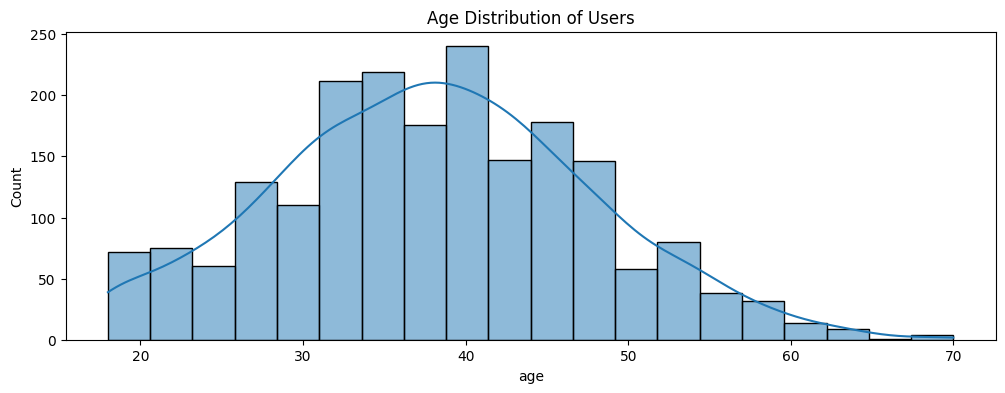

/Users/melekikiz/.pyenv/versions/3.11.4/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


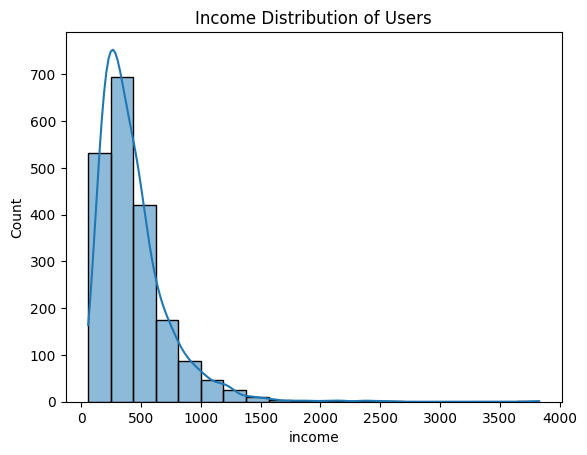

/Users/melekikiz/.pyenv/versions/3.11.4/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


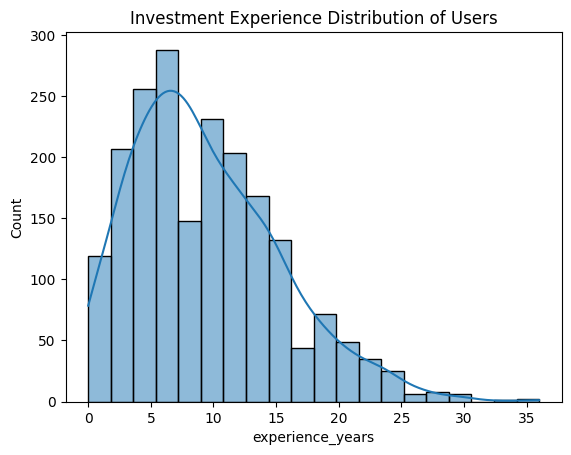

In [16]:
#Demographic Analysis
plt.figure(figsize=(12,4))
sns.histplot(users['age'], bins=20, kde=True)
plt.title("Age Distribution of Users")
plt.show()

sns.histplot(users['income'], bins=20, kde=True)
plt.title("Income Distribution of Users")
plt.show()

sns.histplot(users['experience_years'], bins=20, kde=True)
plt.title("Investment Experience Distribution of Users")
plt.show()

Age Distribution
The age distribution is concentrated between 30 and 45 years old, indicating a mature and financially active investor base. This age range typically corresponds to medium risk tolerance and higher engagement in long-term investment strategies.

Income Distribution
Income displays a slightly right skewed pattern, reflecting a majority of mid-income users and a smaller high income tail. This variation is valuable for identifying different portfolio behaviors and potential segmentation opportunities.

Investment Experience
Most users have 2–10 years of investment experience, suggesting that the dataset is dominated by beginner and intermediate investors. A smaller group of highly experienced investors represents a potential “expert” segment.

/Users/melekikiz/.pyenv/versions/3.11.4/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


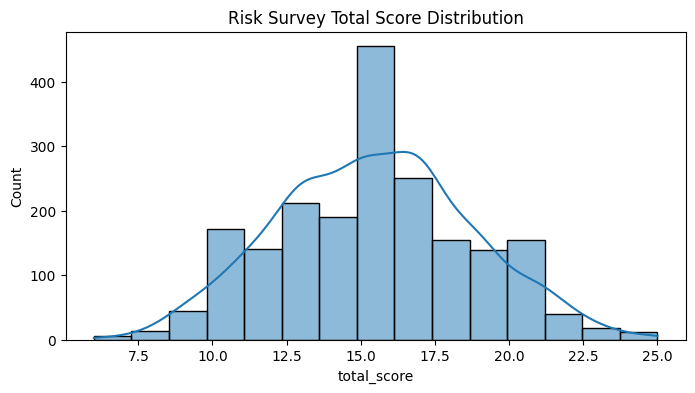

/Users/melekikiz/.pyenv/versions/3.11.4/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


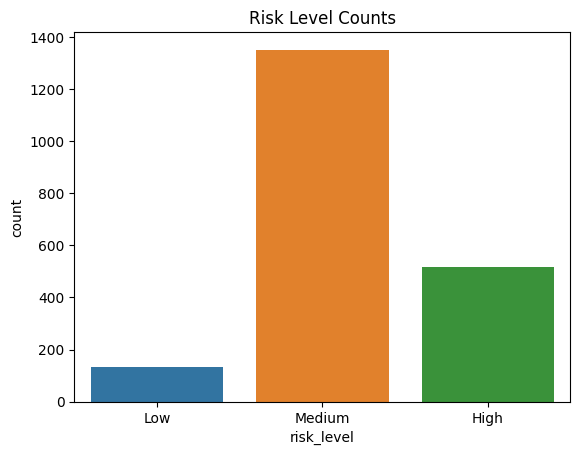

In [18]:
#Risk Survey
plt.figure(figsize=(8,4))
sns.histplot(risk['total_score'], bins=15, kde=True)
plt.title("Risk Survey Total Score Distribution")
plt.show()

bins=[0, 10, 17, 30]
labels =["Low", "Medium", "High"]
risk["risk_level"]=pd.cut(risk['total_score'], bins=bins, labels=labels, include_lowest=True)
sns.countplot(data=risk, x='risk_level')
plt.title("Risk Level Counts")
plt.show()

Total Risk Score Distribution

The distribution of total risk scores shows a smooth spread with a concentration in the mid range. This indicates that most investors have a balanced or moderate approach to financial risk. The presence of tails on both ends confirms that the dataset includes both conservative and aggressive investors, which is valuable for building a robust risk classification model.

Risk Level Counts (Low / Medium / High)

The categorical breakdown of risk levels reveals that the Medium risk group is the largest segment, while Low and High risk groups are smaller but still significantly represented. This balanced segmentation ensures that downstream modeling (e.g., classification or clustering) will not suffer from extreme class imbalance, improving model reliability and interpretability.

/Users/melekikiz/.pyenv/versions/3.11.4/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


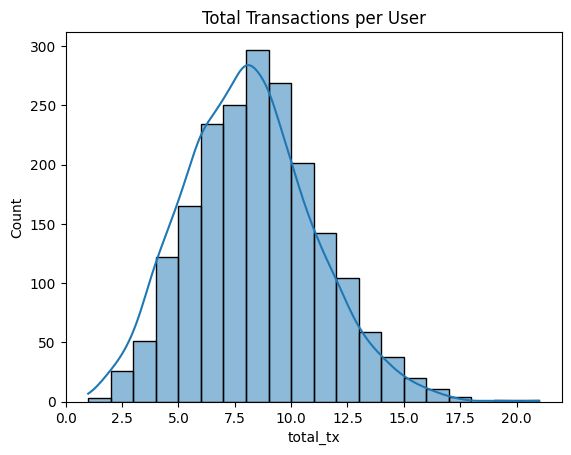

/Users/melekikiz/.pyenv/versions/3.11.4/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


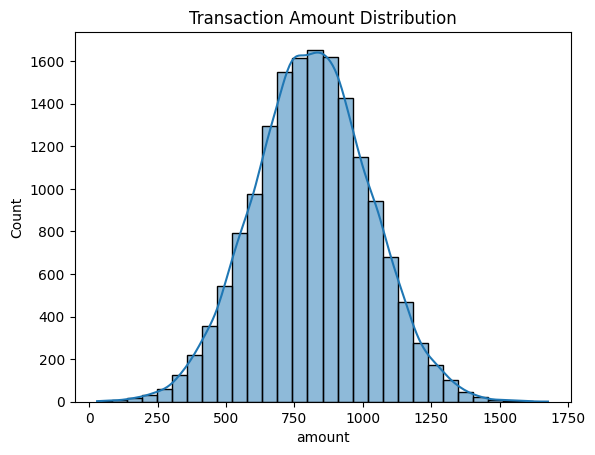

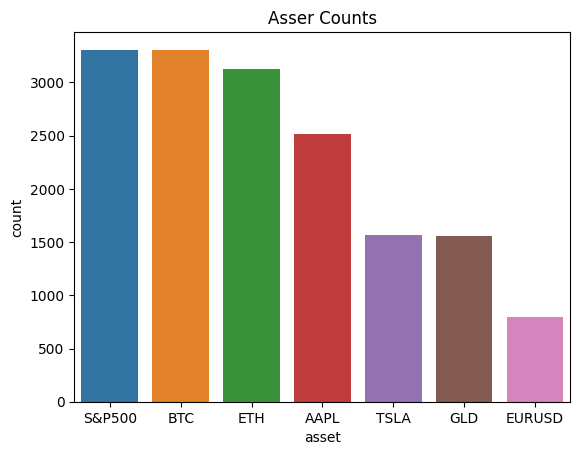

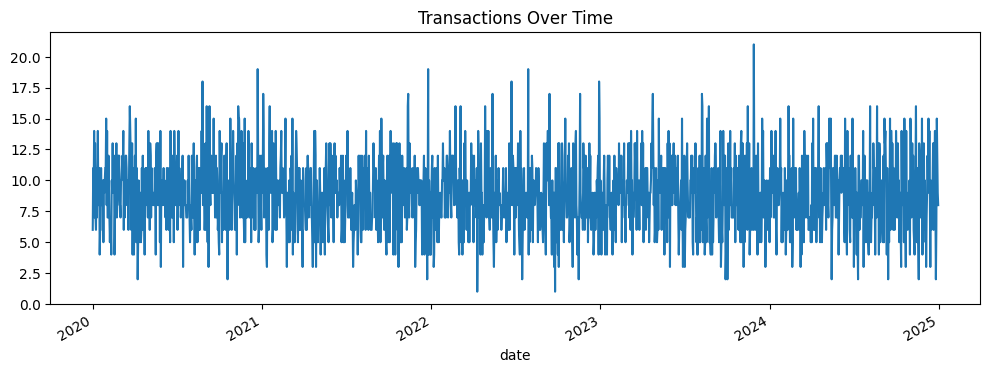

In [19]:
#Transaction Analysis
tx_per_user = transactions.groupby('user_id').size().rename('total_tx').reset_index()
sns.histplot(tx_per_user['total_tx'], bins=20, kde=True)
plt.title("Total Transactions per User")
plt.show()

sns.histplot(transactions['amount'], bins=30, kde=True)
plt.title("Transaction Amount Distribution")
plt.show()

sns.countplot(data=transactions, x='asset', order=transactions['asset'].value_counts().index)
plt.title("Asser Counts")
plt.show()

tx_over_time =transactions.groupby('date').size()
tx_over_time.plot(figsize=(12,4))
plt.title("Transactions Over Time")
plt.show()


Total Transactions per User

The distribution of transaction counts per user is right skewed, indicating that while most users execute a moderate number of transactions, a smaller subset is significantly more active. This pattern is consistent with real world investor behavior where a minority of users drive most of the trading volume.

Transaction Amount Distribution

Transaction amounts show a long tailed distribution, with many small to medium sized trades and fewer large transactions. This reflects realistic market activity, as high value trades are less common but still present. The variation in trade sizes will be important for understanding user risk taking behavior.

Asset Counts

The asset distribution highlights that some investment types are significantly more popular than others. This imbalance is typical in financial portfolios, where certain assets (e.g., stocks or ETFs) attract higher trading activity. The distribution also suggests preferences that may correlate with investor experience or risk tolerance.

Transactions Over Time

The time series view of daily transactions shows a stable pattern with natural fluctuations. The absence of extreme spikes or droughts suggests healthy synthetic data generation and provides confidence that time dependent features such as volatility or trading frequency trends can be reliably extracted.

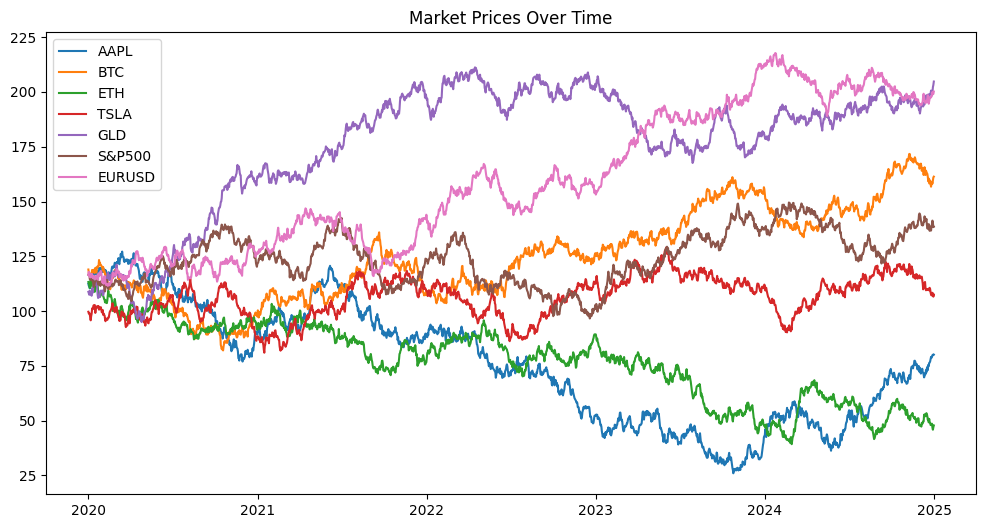

/Users/melekikiz/.pyenv/versions/3.11.4/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


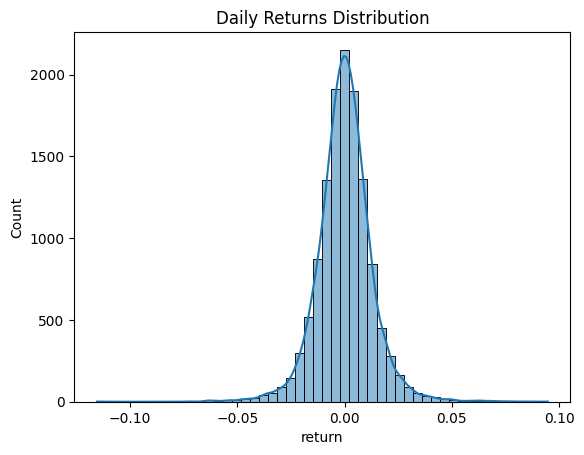

In [21]:
#Market Data Analysis
plt.figure(figsize=(12,6))
for asset in market['asset'].unique():
    subset = market[market['asset']==asset]
    plt.plot(subset['date'], subset['price'], label=asset)
plt.title("Market Prices Over Time")
plt.legend()
plt.show()

market_sorted = market.sort_values(['asset', 'date'])
market_sorted['return'] = market_sorted.groupby('asset')['price'].pct_change()
sns.histplot(market_sorted['return'].dropna(), bins=50, kde=True)
plt.title("Daily Returns Distribution")
plt.show()


Market Prices Over Time

The price trajectories show clear differentiation across assets, each following a distinct trend and volatility pattern. Some assets exhibit steady upward or downward movements, while others fluctuate more sharply. This diversity in price dynamics provides a realistic foundation for modeling investment behavior and constructing risk related features such as volatility and momentum.

Daily Returns Distribution

The distribution of daily returns is centered around zero with fat tails, indicating that most price movements are small but large swings do occur occasionally. This pattern is consistent with real financial market behavior and highlights the presence of volatility clustering. Such a distribution is beneficial for downstream modeling as it accurately captures market uncertainty and risk.

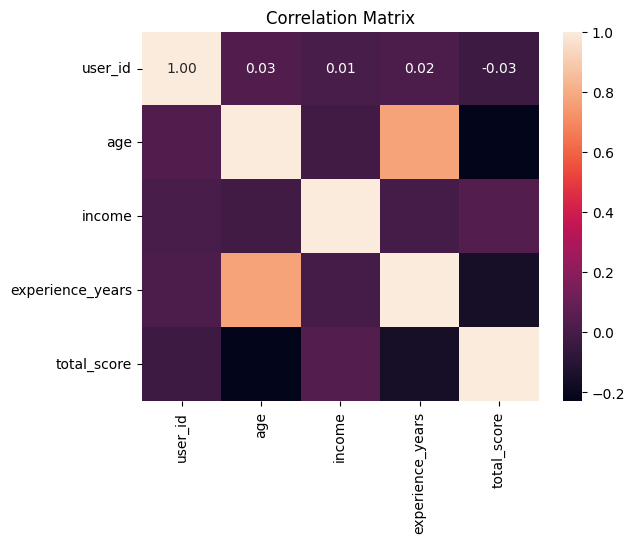

In [22]:
#Correlation Analysis
user_features = users.merge(risk[['user_id', 'total_score']], on='user_id', how='left')
sns.heatmap(user_features.corr(),annot=True, fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

Correlation Analysis — Interpretation

The correlation matrix shows that demographic variables (age, income, experience) have weak linear relationships with the risk survey score.

Experience & Age show a moderate positive correlation, which is expected since older users typically have more years of market exposure.

Income and Risk Score exhibit only a minimal positive relationship, suggesting that higher income does not necessarily correspond to higher (or lower) risk appetite.

Overall, the correlations are low, indicating that risk behavior is not strongly explained by basic demographics alone, and more complex behavioral or transactional features may be required for predictive modeling.